In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
}
# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif fonts
    }
)

# Set seaborn style for better aesthetics
# sns.set_style("whitegrid")

## Cross-lingual

In [9]:
name_mapping = {
    'MetaMath-Mistral-7B.csv': 'Math',
    'GEITje-7B-ultra.csv': 'NL',
    'phenotype_0.csv': 'MERG$E^3$',
    'old_phenotype_0.csv': 'MERG$E^3$',
    'Arithmo2-Mistral-7B.csv': 'Math (2)',
    'em_german_mistral_v01.csv': 'DE',
    'phenotype_0_german_ties.csv': 'MERG$E^3$',
    'Abel-7B-002.csv': 'Math (3)', # TODO
    'Mistral-7B-v0.1.csv': None,  # TODO
    'Mistral-Ita-7b.csv': 'IT',
    'RoMistral-7b-Instruct.csv': 'RO',
}

In [10]:
# ----------------------------------------------------------------------
# Read data for each language
# ------------------------------------------------------------------------
# Example file names; adjust as needed
df_de = pd.read_csv("data/german_cross.csv")    # 'bin', 'accuracy'
df_it = pd.read_csv("data/italian_cross.csv")   # 'bin', 'accuracy'
df_nl = pd.read_csv("data/dutch_cross.csv")     # 'bin', 'accuracy'
df_ro = pd.read_csv("data/romanian_cross.csv")  # 'bin', 'accuracy'

# Tag each DataFrame with the appropriate language
df_de["language"] = "German"
df_it["language"] = "Italian"
df_nl["language"] = "Dutch"
df_ro["language"] = "Romanian"

# Combine everything into a single DataFrame
df_all = pd.concat([df_de, df_it, df_nl, df_ro], ignore_index=True)

In [11]:
# rename 
df_all['bin'] = df_all['bin'].map(name_mapping)

df_all.dropna(inplace=True)


In [12]:
df_all

,bin,accuracy,language
1,Math (3),0.125853,German
2,Math (2),0.239575,German
3,DE,0.142532,German
4,MERG$E^3$,0.443518,German
5,IT,0.318423,Italian
6,Math,0.318423,Italian
7,MERG$E^3$,0.368461,Italian
8,NL,0.092494,Dutch
9,Math,0.289613,Dutch
10,MERG$E^3$,0.390447,Dutch


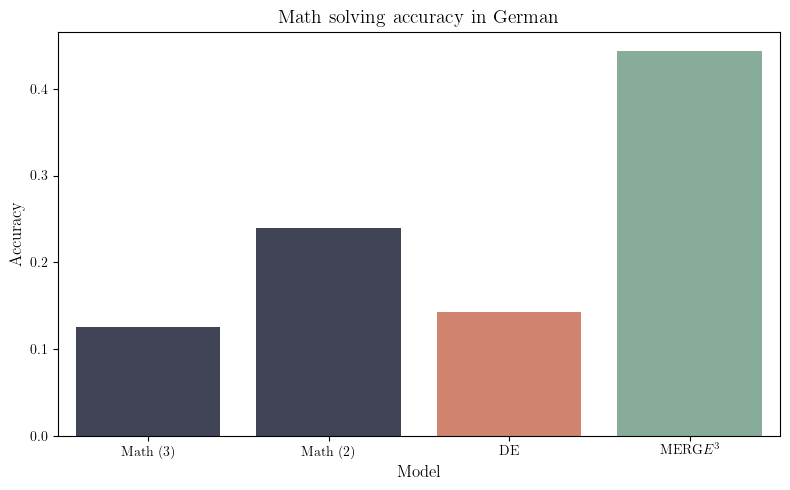

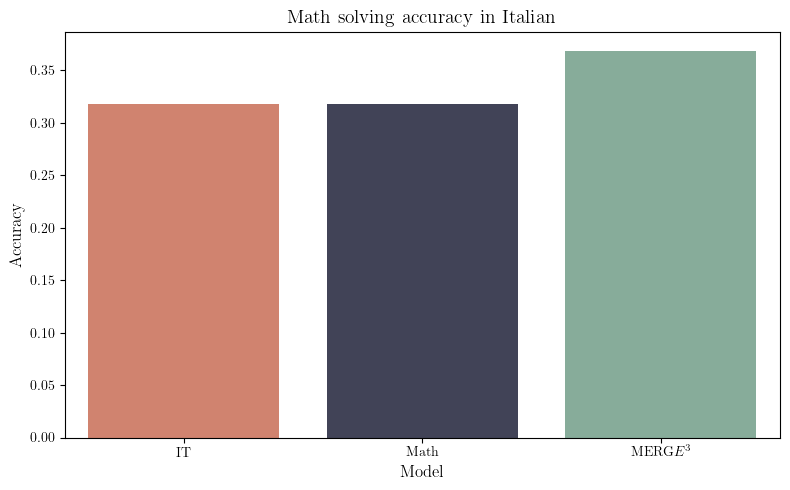

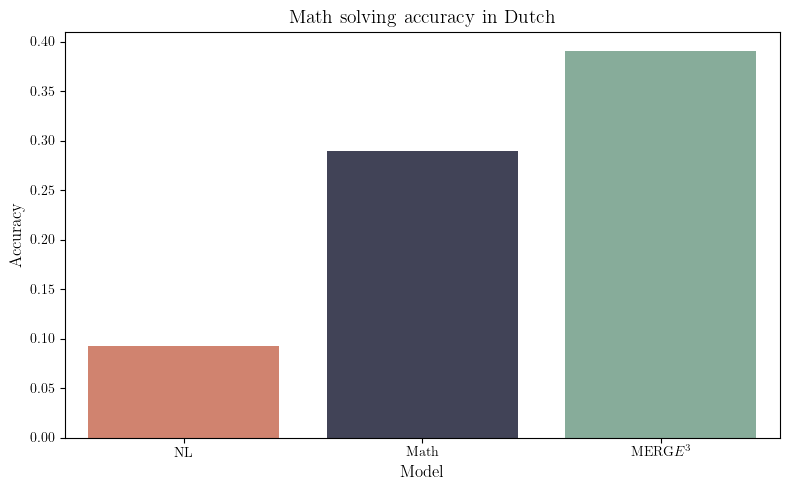

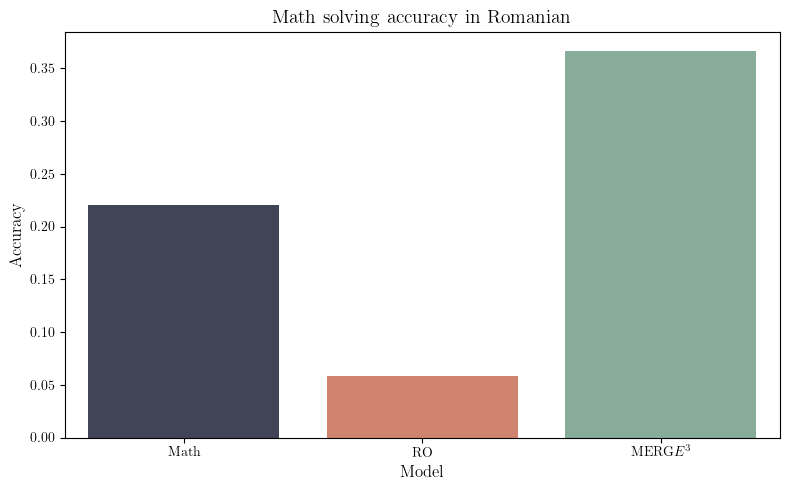

In [13]:

colors = {
     'MERG$E^3$': color_dict["Cambridge blue"],
        'Math': color_dict["Delft Blue"],
        'Math (2)': color_dict["Delft Blue"],
        'Math (3)': color_dict["Delft Blue"],
        'DE': color_dict["Burnt sienna"],
        'IT': color_dict["Burnt sienna"],
        'RO': color_dict["Burnt sienna"],
        'NL': color_dict["Burnt sienna"],
}

for lang in df_all['language'].unique():
    plt.figure(figsize=(8, 5))
    
    sns.barplot(
        data=df_all[df_all['language'] == lang],
        y="accuracy",
        hue="bin",
        palette=colors,
        x="bin",
    )

    plt.title(f"Math solving accuracy in {lang}", fontsize=14)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    plt.tight_layout()
    plt.show()